<a href="https://colab.research.google.com/github/ksneha19/RecipeSharingPlatform/blob/master/bcp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub
import shutil
import os

In [2]:
breast_cancer_dataset = kagglehub.dataset_download('yasserh/breast-cancer-dataset')

100%|██████████| 48.6k/48.6k [00:00<00:00, 40.2MB/s]

Extracting files...


In [21]:
print(breast_cancer_dataset)

/root/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1


#Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [23]:
df = pd.read_csv(f'{breast_cancer_dataset}/breast-cancer.csv')

#DATA PREPROCESSING

In [24]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
df.shape

(569, 32)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [27]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [28]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [29]:
df.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


In [30]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [31]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


<Axes: >

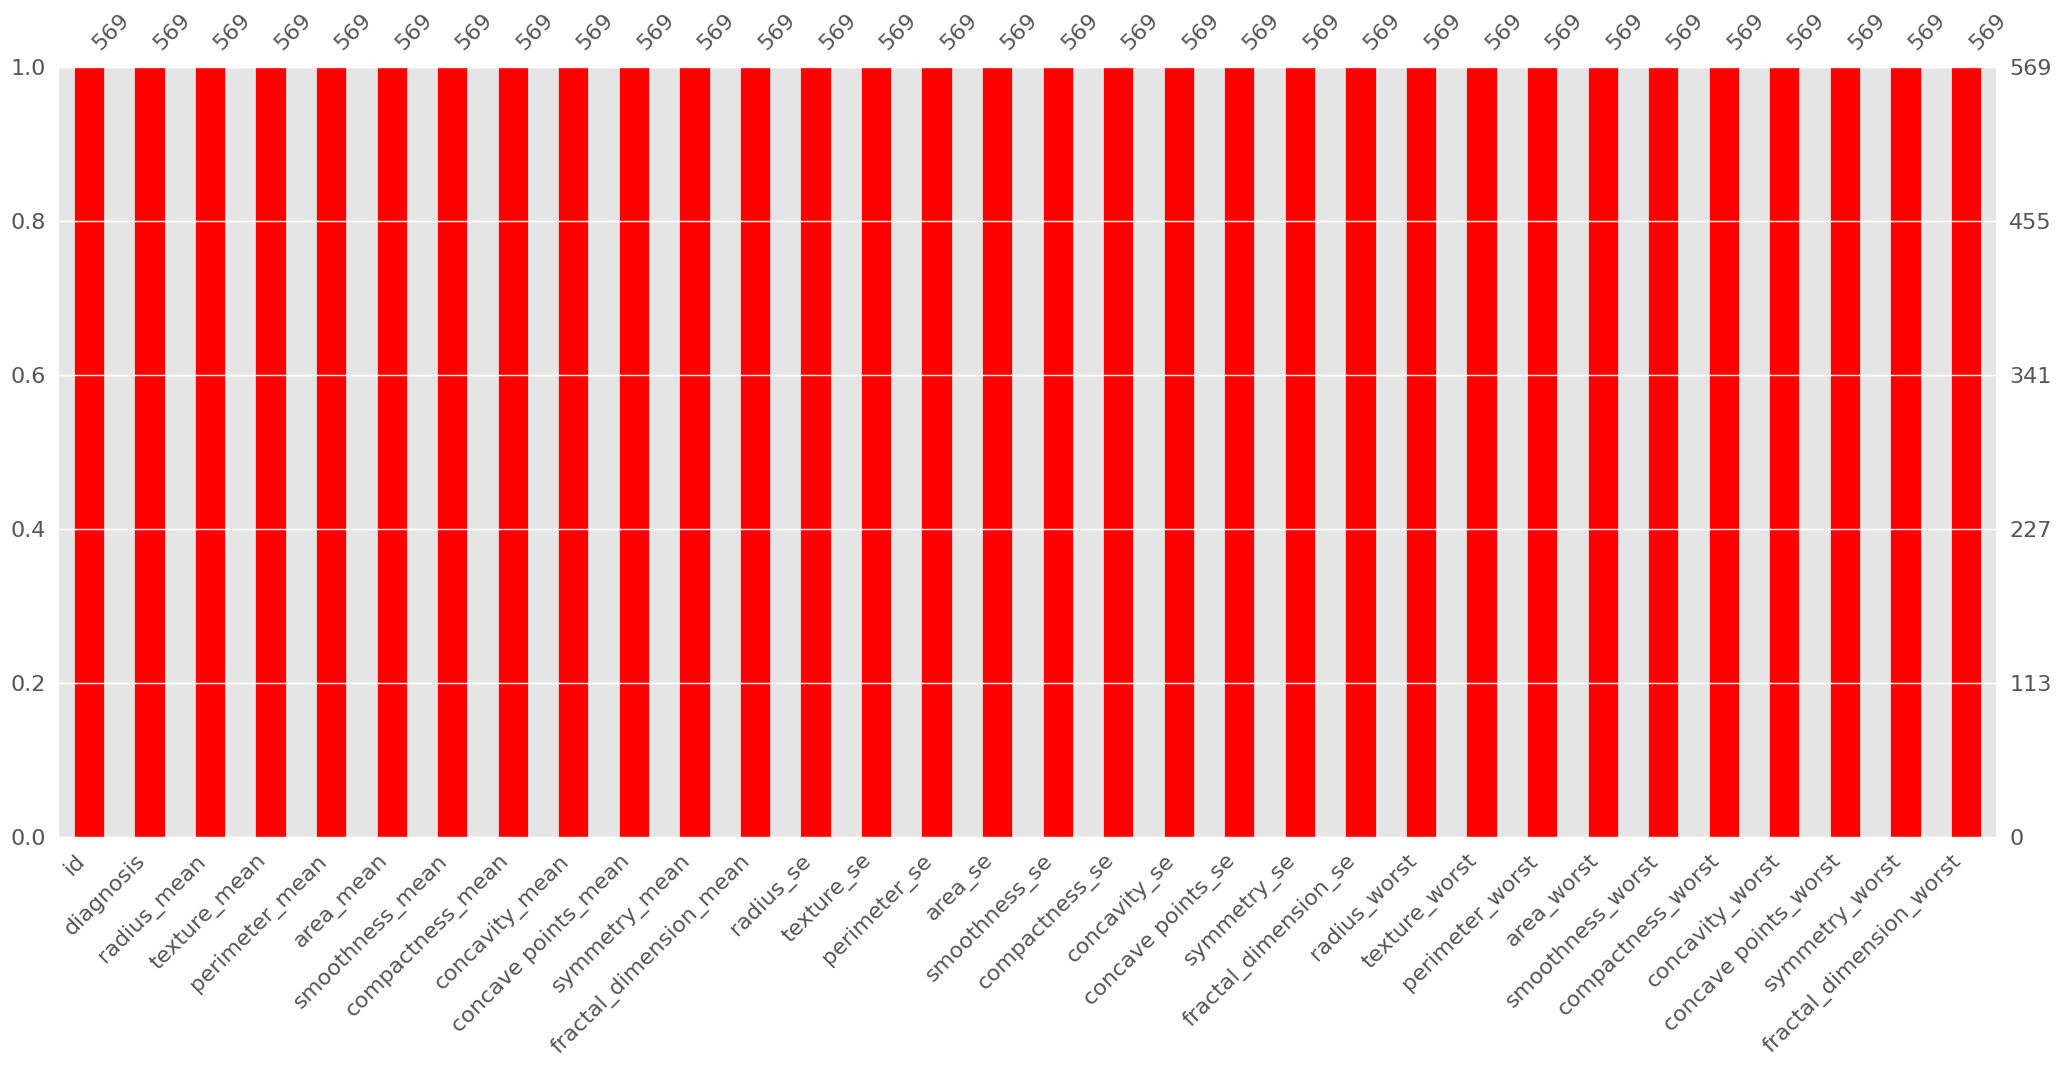

In [32]:
fig = plt.figure(figsize=(15,8))
msno.bar(df, color="red")

In [33]:
# There are no missing value in the dataset

In [34]:
# M-> Malignint
# B-> Benign

In [35]:
# Binary classification
df['diagnosis'] = df['diagnosis'].apply(lambda val:1 if val=='M' else 0)

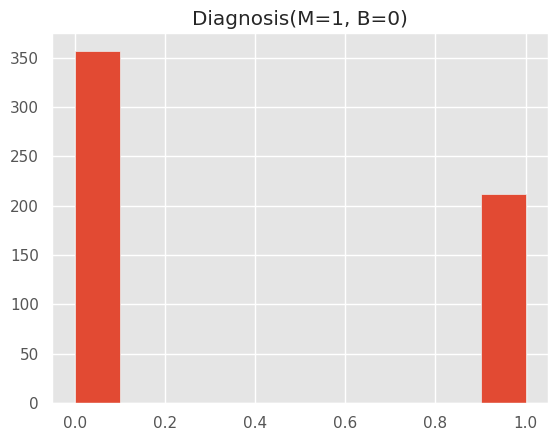

In [36]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis(M=1, B=0)')
plt.show()

#EDA

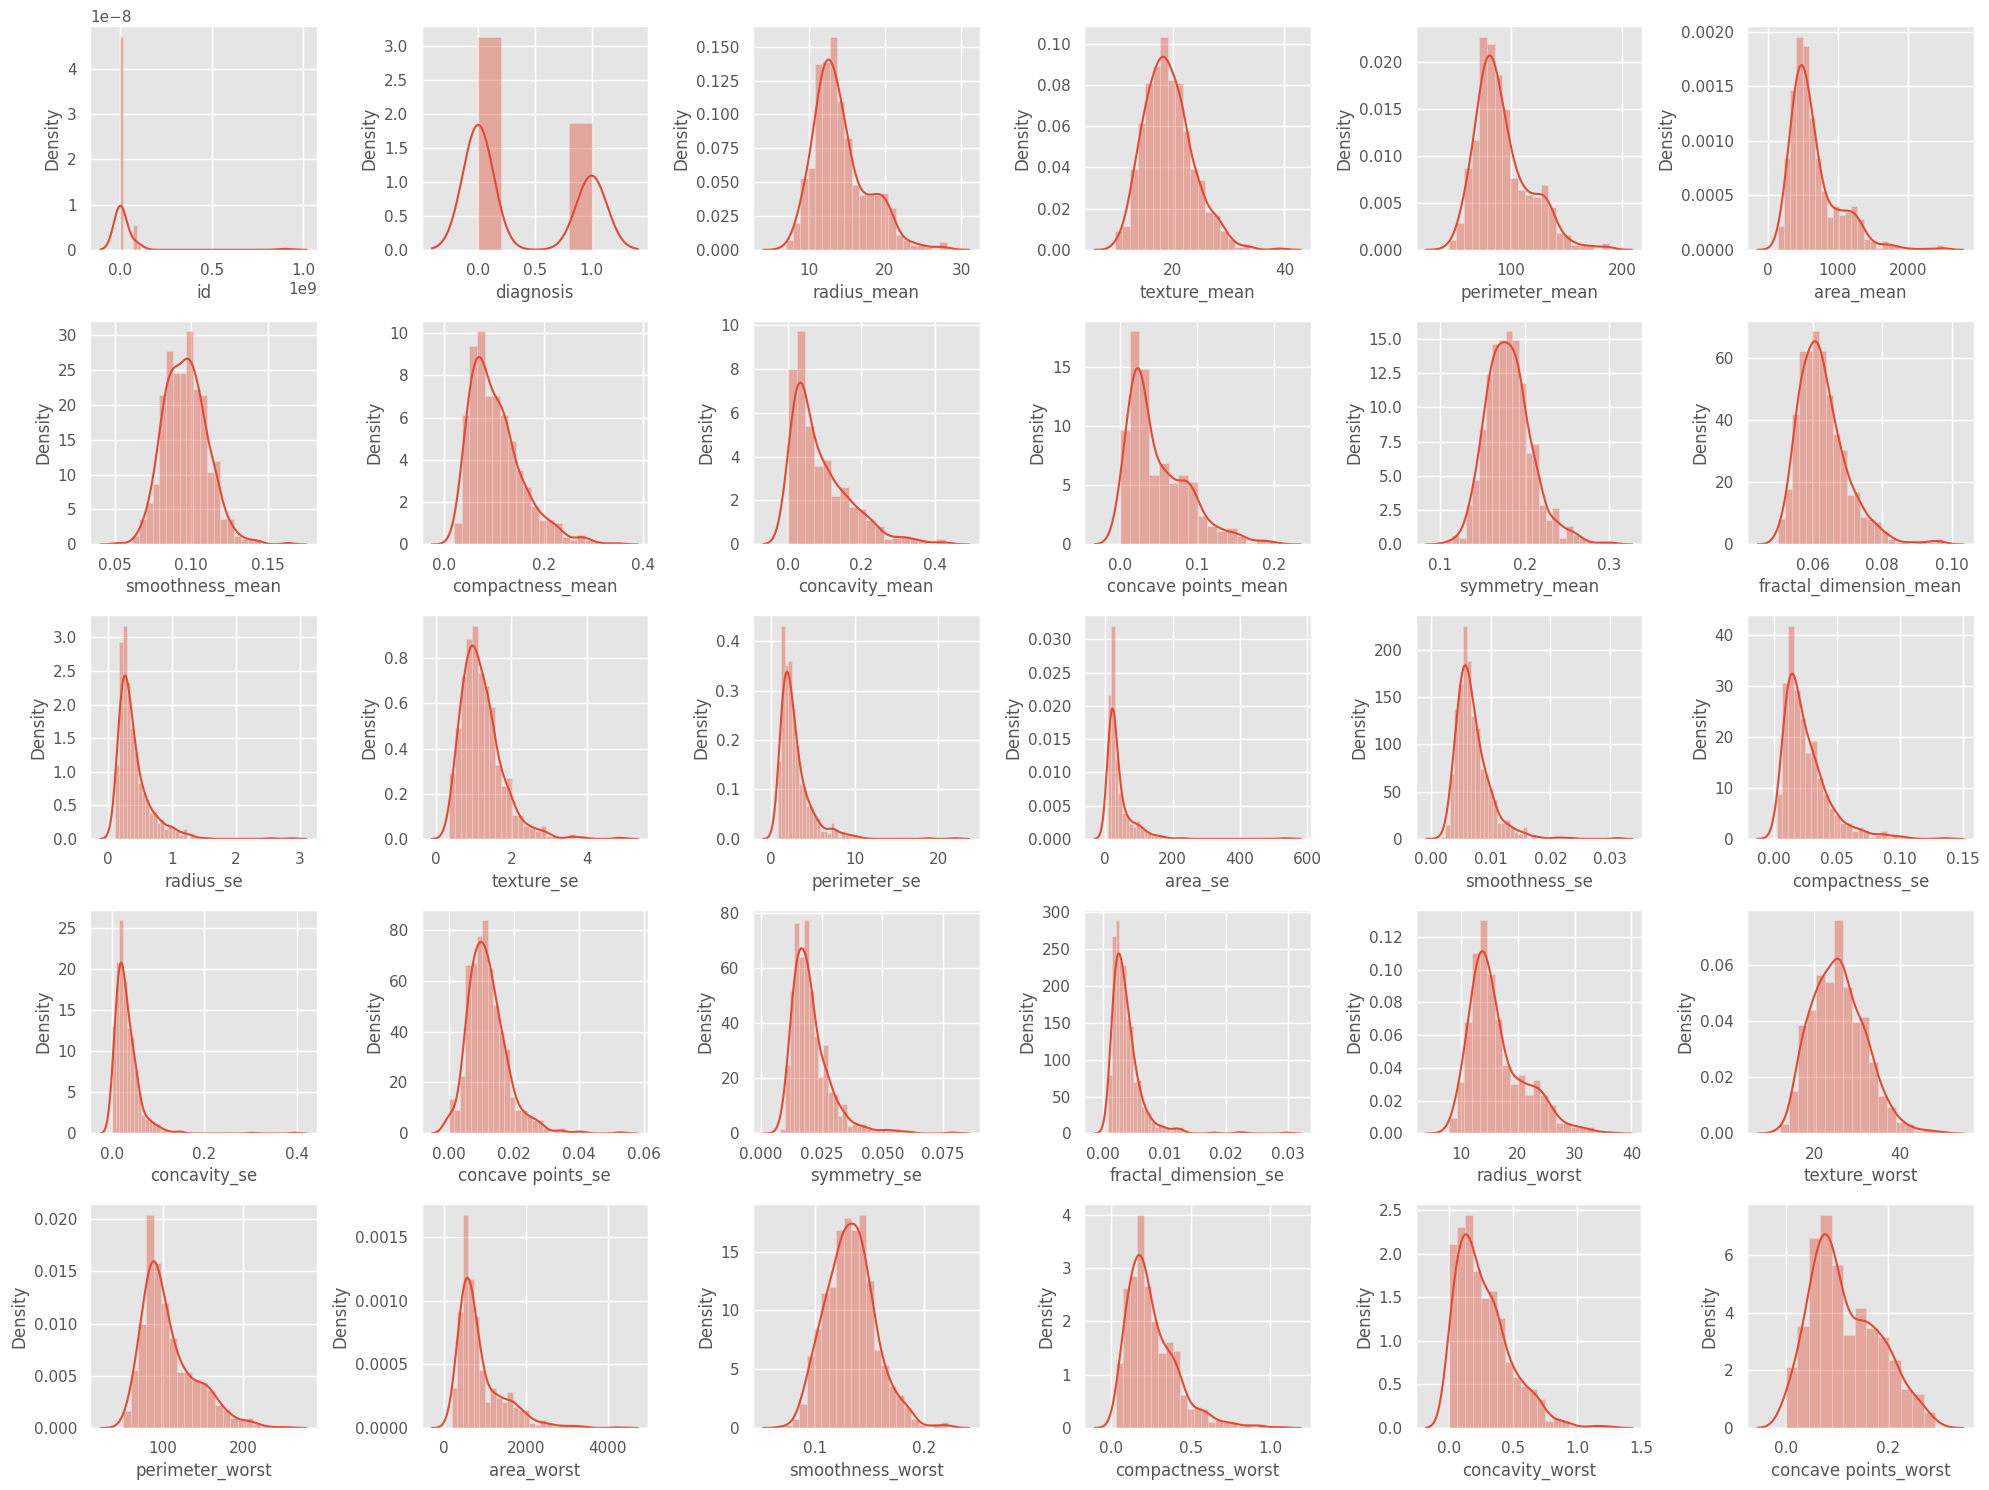

In [20]:
# each 5 row its having 6 columns
# density graph

plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax = plt.subplot(5,6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()
plt.show()

In [57]:
# CORR
df.corr()

,id,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.099770,-0.012968,0.000096,0.044158,-0.022114,-0.052511,-0.007526,0.177742,...,-0.017306,0.025725,0.064720,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.415185,0.358560,0.596534,0.776614,0.330499,-0.012838,-0.008303,0.548236,...,-0.006522,0.077972,0.456903,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
texture_mean,0.099770,0.415185,1.000000,-0.023389,0.236702,0.293464,0.071401,-0.076437,0.386358,0.259845,...,0.009127,0.054458,0.912045,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
smoothness_mean,-0.012968,0.358560,-0.023389,1.000000,0.659123,0.553695,0.557775,0.584792,0.068406,0.246552,...,0.200774,0.283607,0.036072,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.236702,0.659123,1.000000,0.831135,0.602641,0.565369,0.046205,0.455653,...,0.229977,0.507318,0.248133,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concave points_mean,0.044158,0.776614,0.293464,0.553695,0.831135,1.000000,0.462497,0.166917,0.021480,0.690299,...,0.095351,0.257584,0.292752,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.330499,0.071401,0.557775,0.602641,0.462497,1.000000,0.479921,0.128053,0.223970,...,0.449137,0.331786,0.090651,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.052511,-0.012838,-0.076437,0.584792,0.565369,0.166917,0.479921,1.000000,0.164174,-0.090170,...,0.345007,0.688132,-0.051269,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297
texture_se,-0.007526,-0.008303,0.386358,0.068406,0.046205,0.021480,0.128053,0.164174,1.000000,0.111567,...,0.411621,0.279723,0.409003,-0.083195,-0.073658,-0.092439,-0.068956,-0.119638,-0.128215,-0.045655
area_se,0.177742,0.548236,0.259845,0.246552,0.455653,0.690299,0.223970,-0.090170,0.111567,1.000000,...,0.134109,0.127071,0.196497,0.811408,0.125389,0.283257,0.385100,0.538166,0.074126,0.017539


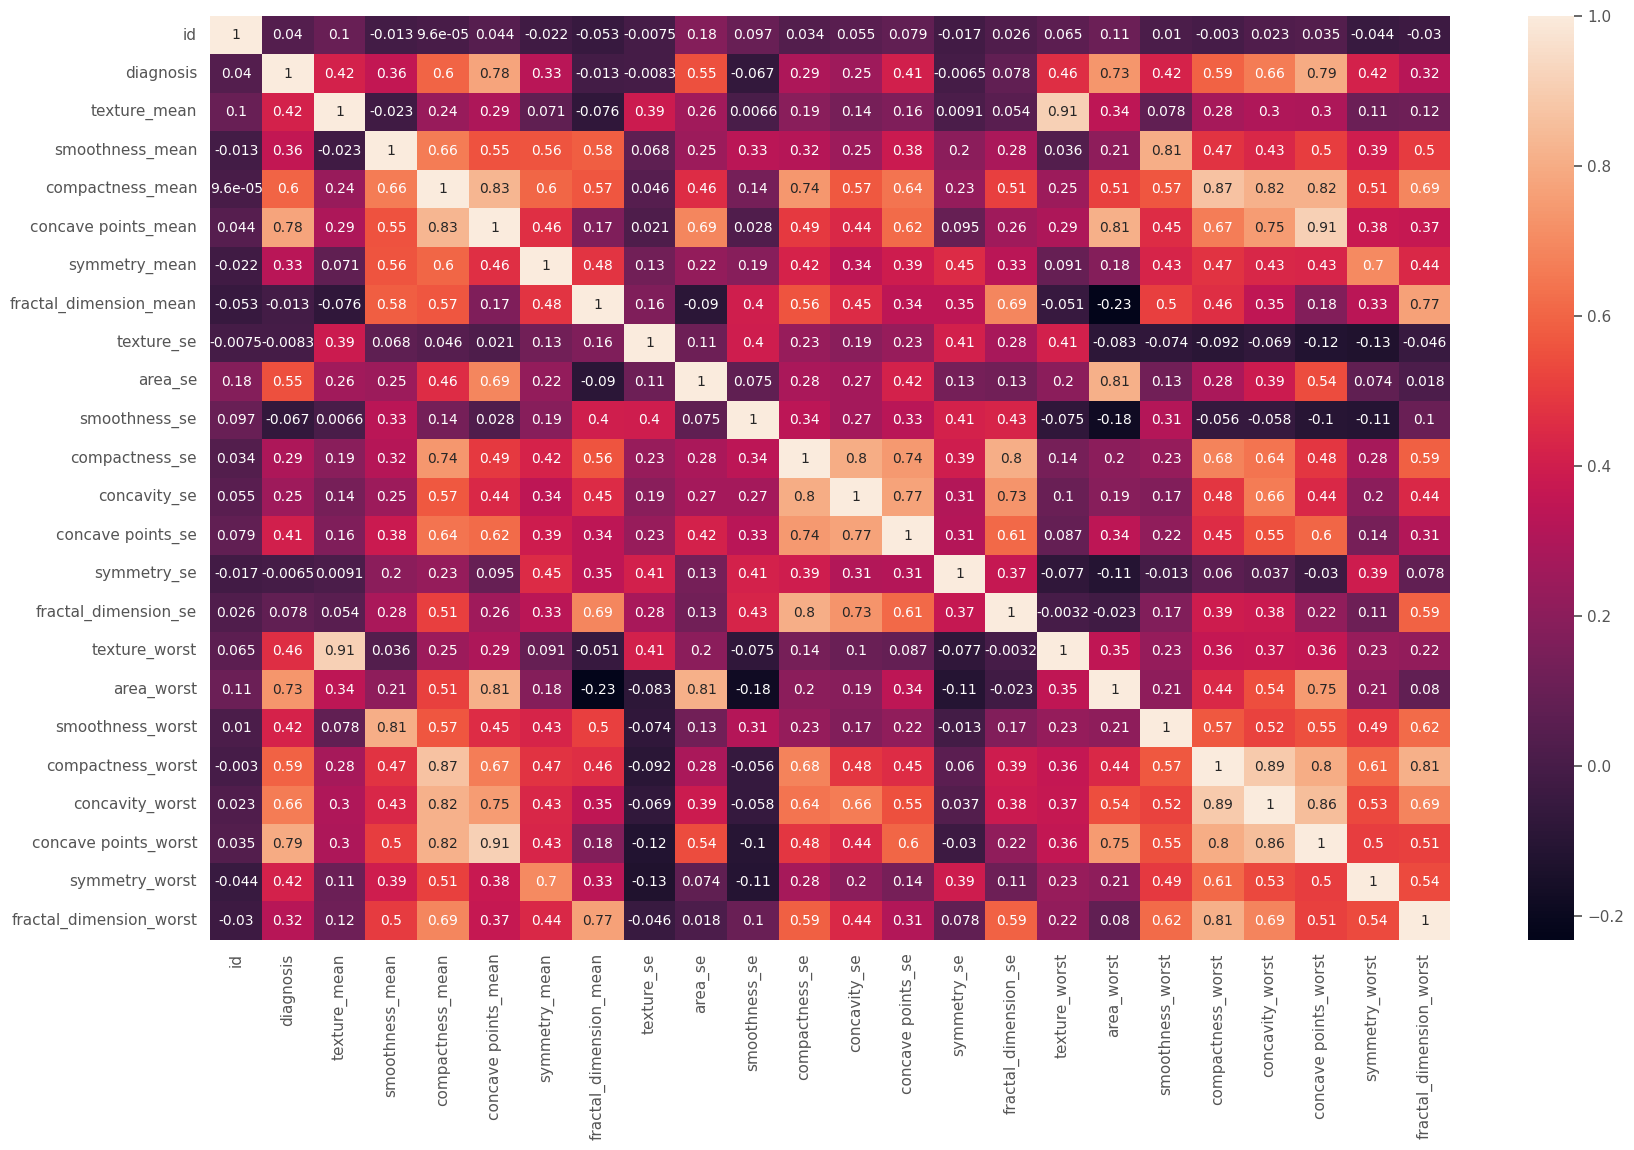

In [58]:
# heatmap
plt.figure(figsize=(20,12))
corr=df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [59]:
df.drop('id', axis=1, inplace=True)

#FEATURE SELECTION

In [37]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]

df = df.drop(to_drop, axis=1)

print(df.shape[1])

24


In [38]:
df.head()

,id,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   texture_mean             569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   compactness_mean         569 non-null    float64
 5   concave points_mean      569 non-null    float64
 6   symmetry_mean            569 non-null    float64
 7   fractal_dimension_mean   569 non-null    float64
 8   texture_se               569 non-null    float64
 9   area_se                  569 non-null    float64
 10  smoothness_se            569 non-null    float64
 11  compactness_se           569 non-null    float64
 12  concavity_se             569 non-null    float64
 13  concave points_se        569 non-null    float64
 14  symmetry_se              5

 32 features reduced to 23 now after selecting important features

#Model

In [40]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=0)

In [42]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train.shape

(455, 23)

#KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn.predict(X_test)

In [46]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0])

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Training Accuracy: ", accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))

print("Testing Accuracy: ", knn_acc)
y_pred = knn.predict(X_test)

print()
print(confusion_matrix(y_test, y_pred))
print()

print(classification_report(y_test, y_pred))

Training Accuracy:  0.9626373626373627
Testing Accuracy:  0.956140350877193

[[66  1]
 [ 4 43]]

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



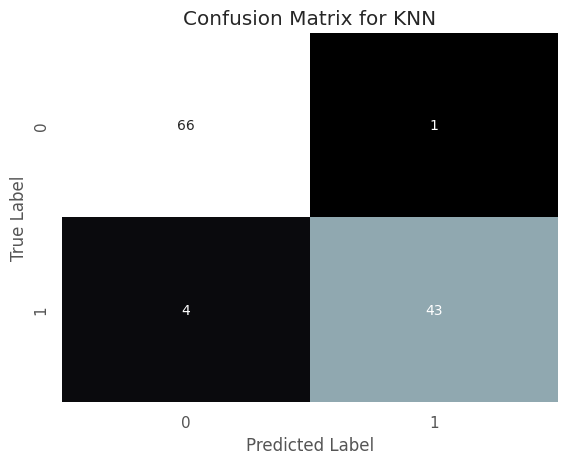

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='bone', cbar=False)

plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#Decision Tree

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [51]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'splitter': 'random'}

In [52]:
grid_search_dt.best_score_

np.float64(0.9604395604395606)

In [53]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=5, splitter = 'random')

In [54]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Training Accuracy: ", accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print("Testing Accuracy: ", dtc_acc)
y_pred = dtc.predict(X_test)

print()
print(confusion_matrix(y_test, y_pred))

print()
print(classification_report(y_test, y_pred))

Training Accuracy:  0.9714285714285714
Testing Accuracy:  0.9649122807017544

[[65  2]
 [ 2 45]]

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



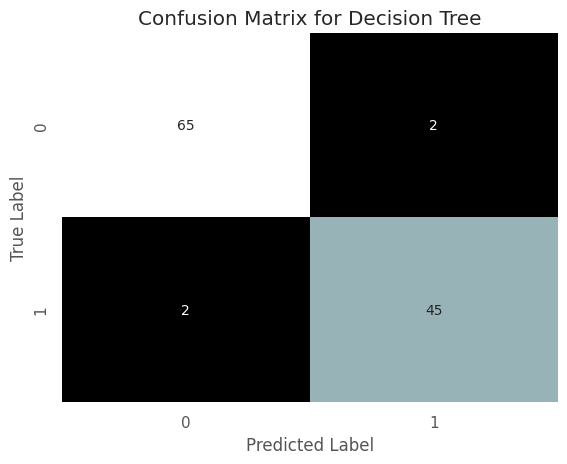

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='bone', cbar=False)

plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the RandomForestClassifier
rand_clf = RandomForestClassifier()

# Define the hyperparameter grid
parameters = {
    'n_estimators': [180, 100, 150],
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 5],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [2, 3],
    'max_features': ['sqrt', 0.5, 'log2'],
}

In [62]:
# Perform GridSearchCV
grid_search_rf = GridSearchCV(rand_clf, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [10, 5],
                         'max_features': ['sqrt', 0.5, 'log2'],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [2, 3],
                         'n_estimators': [180, 100, 150]},
             verbose=1)

In [63]:
# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
Best Score: 0.9670329670329672


In [64]:
# new RandomForestClassifier with best hyperparameters
rand_clf = RandomForestClassifier(**grid_search_rf.best_params_)

In [65]:
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=3)

In [66]:
y_pred = rand_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: 0.97368')

Test set accuracy: 0.97368


In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Training Accuracy: ", accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print("Testing Accuracy: ", rand_clf_acc)

print()
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Training Accuracy:  0.9934065934065934
Testing Accuracy:  0.9649122807017544

[[66  1]
 [ 3 44]]

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [70]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, rand_clf.predict_proba(X_test)[:, 1])
auc = metrics.roc_auc_score(y_test, rand_clf.predict_proba(X_test)[:, 1])


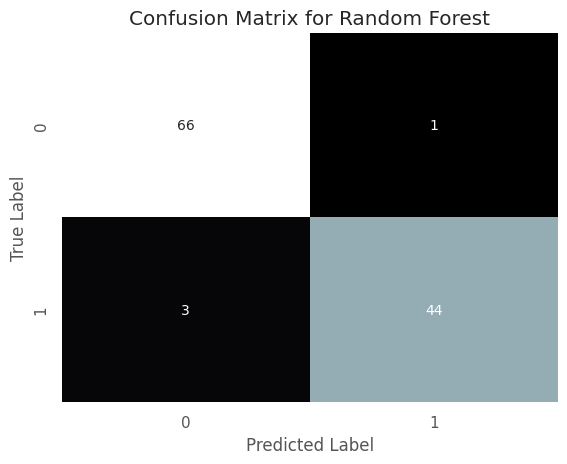

In [71]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='bone', cbar=False)

plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#XGBClassifier

In [72]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Training Accuracy: ", accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print("Training Accuracy: ", xgb_acc)

y_pred = xgb.predict(X_test)

print()
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Training Accuracy:  0.9934065934065934
Training Accuracy:  0.9385964912280702

[[63  4]
 [ 3 44]]

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



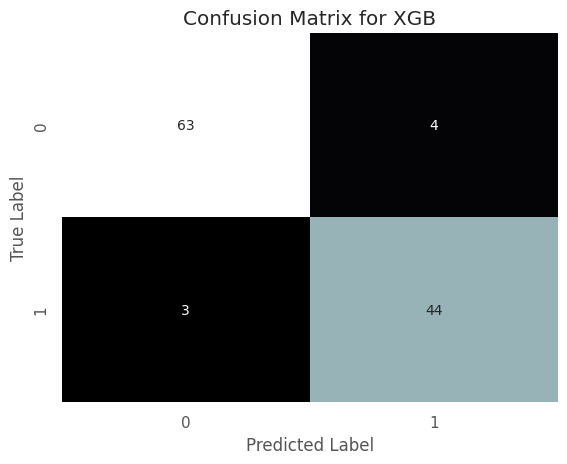

In [74]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='bone', cbar=False)

plt.title('Confusion Matrix for XGB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [75]:
models = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree Classifier', 'Random Forest Classifier','XgBoost'],
    'Score': [100*round(knn_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4),
              100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classifier,96.49
2,Random Forest Classifier,96.49
0,KNN,95.61
3,XgBoost,93.86


#Model Comparison

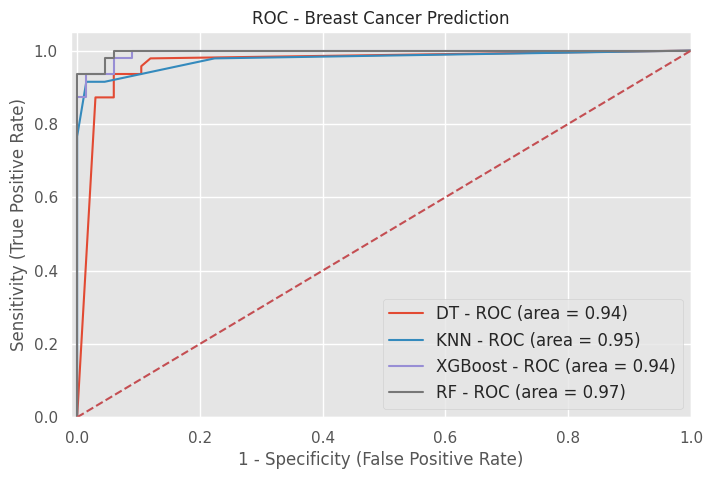

In [76]:
from sklearn import metrics
plt.figure(figsize=(8,5))

models = [
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
}]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

ACCURACY:

[96.49, 95.61, 93.86, 96.49]
ROC:

[np.float64(97.13000000000001), np.float64(95.0), np.float64(93.82000000000001), np.float64(94.25)]


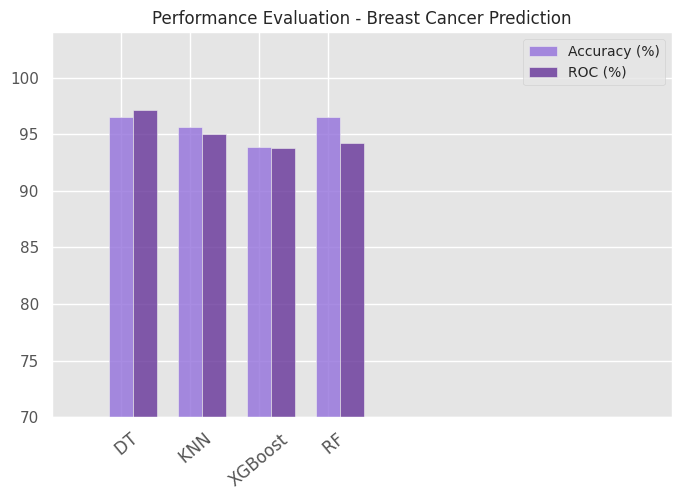

In [77]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

models = [
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
}
]

means_roc = []
means_accuracy = [100*round(dtc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4),
                  100*round(rand_clf_acc,4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print("ACCURACY:\n")
print(means_accuracy)

print("ROC:\n")
print(means_roc)

# data to plot
n_groups = 4
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)
plt.xticks(index, ('   DT', '   KNN', 'XGBoost' , '   RF'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

# Best Model is Random Forest with accuracy : 97.37% and ROC: 95% and it is saved for using locally , random forest model and scaler both are saved for using it in the website locally.

In [ ]:
import joblib

# Save the best model and scaler
joblib.dump(rand_clf, 'best_rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

In [ ]:
import joblib

In [ ]:
# Load the model and scaler
loaded_model = joblib.load('best_rf_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')


In [ ]:
def model_predict(sample_input):
  selected_features = [
      'texture_mean',
      'smoothness_mean',
      'compactness_mean',
      'concave points_mean',
      'symmetry_mean',
      'fractal_dimension_mean',
      'texture_se',
      'area_se',
      'smoothness_se',
      'compactness_se',
      'concavity_se',
      'concave points_se',
      'symmetry_se',
      'fractal_dimension_se',
      'texture_worst',
      'area_worst',
      'smoothness_worst',
      'compactness_worst',
      'concavity_worst',
      'concave points_worst',
      'symmetry_worst',
      'fractal_dimension_worst'
  ]

  # Convert to DataFrame with proper feature names
  sample_df = pd.DataFrame([sample_input], columns=selected_features)

  # Scale the input data
  scaled_input = loaded_scaler.transform(sample_df)

  # Make prediction using the loaded model
  prediction = loaded_model.predict(scaled_input)[0]

  # Interpret the result
  result = "Malignant (Cancerous)" if prediction == 1 else "Benign (Non-Cancerous)"
  print("Prediction:", result)

In [ ]:
sample_input = np.array([10.38, 0.1184, 0.2776, 0.1471, 0.2419, 0.07871, 0.9053, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 17.33, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189])

In [ ]:
model_predict(sample_input)